# Decision Tree and a Bootstrap Aggregated Forest on Synthetic Data

This notebook demonstrates the use of Decision Tree Regressor on a synthetic dataset. The dataset consists of both important and random features generated using various distributions. We will visualize the correlation matrix of the features and train a Decision Tree Regressor to predict the target variable `Y`.

In [1]:
# Import necessary libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from matplotlib.legend_handler import HandlerLine2D

## Data Generation

In [2]:
# Generate synthetic data
data = pd.DataFrame(
    {
        'important_feature_poisson': np.random.poisson(5, 1000),
        'important_feature_dummy': np.random.binomial(1, 0.5, 1000),
        'random_feature_normal': np.random.normal(0, 100, 1000),
        'random_feature_dummy': np.random.binomial(1 , 0.5, 1000)
    }
)

# Generate target variable
data['Y'] = (
    np.random.normal(5, 3, 1000) * data['important_feature_poisson'] + 
    np.random.normal(10, 3, 1000) * data['important_feature_dummy']
)

In [3]:
# Display first few rows of the dataset
data.head()

# Display the shape of the dataset
data.shape

(1000, 5)

## Correlation Matrix

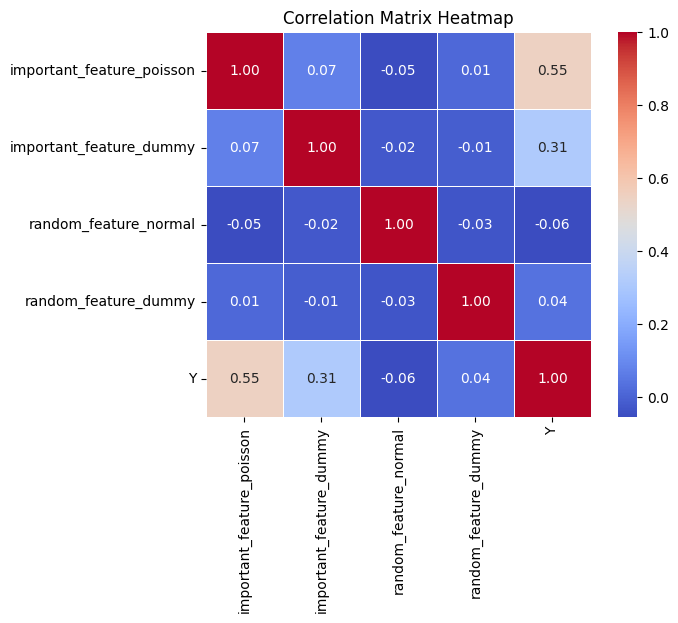

In [4]:
# Calculate correlations
correlations = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(7, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Set titles and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

### Correlation Matrix Analysis

The correlation matrix heatmap above shows the relationships between the features in the dataset and the target variable `Y`. Here are the key observations:

- **important_feature_poisson** has a strong positive correlation with `Y` (0.57), indicating it significantly influences the target variable.
- **important_feature_dummy** also shows a positive correlation with `Y` (0.20), though weaker than **important_feature_poisson**.
- **random_feature_normal** and **random_feature_dummy** have very weak correlations with `Y` (-0.03 and 0.01 respectively), indicating they do not have a significant impact on the target variable.
- The features do not exhibit strong correlations with each other, suggesting that multicollinearity is not a major concern in this dataset.

Based on these observations, it can be inferred that **important_feature_poisson** is the most influential predictor for `Y`, followed by **important_feature_dummy**. The random features contribute little to the prediction of `Y`.

In [5]:
# Creating a DataFrame from the dataset
df = pd.DataFrame(data)

# Defining features and target
X = df.drop("Y", axis=1)
y = df["Y"]

In [6]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Basic Decision Tree Regressor

In [7]:
# Building a Decision Tree Regressor with default parameters
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

# Predicting on the test dataset
y_pred = dt_regressor.predict(X_test)

# Computing the Root Mean Squared Error (RMSE) for the test dataset
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Calculating R-squared for accuracy
accuracy = r2_score(y_test, y_pred)

# Printing RMSE and accuracy
print(f"RMSE: {rmse:.4f}")
print(f"Accuracy (R-squared): {accuracy:.4f}")

RMSE: 23.0430
Accuracy (R-squared): -0.3677


### Model Performance Analysis
#### Inference:
1. **High RMSE**: The RMSE value of 22.6493 indicates that the model's predictions are, on average, about 22.65 units away from the actual values. This high error suggests that the model is not performing well.
2. **Negative R-squared**: The R-squared value of -0.5686 indicates that the model is performing worse than a simple mean prediction. A negative R-squared value suggests that the model does not capture the variance in the data effectively.

#### Possible Reasons for Poor Performance:
- **Overfitting**
- **Feature Relevance**

#### Next Steps:
1. **Hyperparameter Tuning**: Adjust the hyperparameters of the Decision Tree Regressor to prevent overfitting. Consider parameters like `max_depth`, `min_samples_split`, and `min_samples_leaf`.
2. **Feature Engineering**: Reassess and possibly engineer additional features that might help improve the model's performance.

By addressing these points, we can aim to improve the model's accuracy and reduce the prediction error.

## Hyperparameter Tuning
### Max_depth

In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Setting up the range for max_depth
max_depths = np.arange(1, 33)  # This will create an array of integers from 1 to 32

# Lists to store RMSE results
train_results = []
test_results = []

# Looping through different values of max_depth
for max_depth in max_depths:
    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_rmse = math.sqrt(train_mse)
    test_rmse = math.sqrt(test_mse)
    
    train_results.append(train_rmse)
    test_results.append(test_rmse)

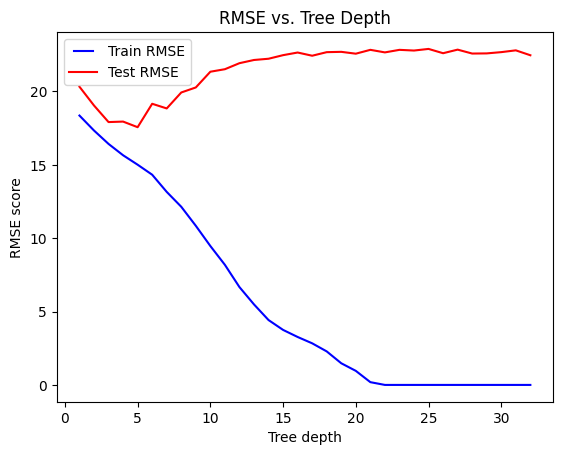

In [9]:
# Plotting the results
line1, = plt.plot(max_depths, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_depths, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('Tree depth')
plt.title('RMSE vs. Tree Depth')
plt.show()

#### Observations:
- From the graph, the Tree depth of 4 seems to be optimal, as the graphs diverge after that.

### Min_samples_split

In [10]:
# Setting up the range for min_samples_split
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

# Lists to store RMSE results
train_results = []
test_results = []

# Looping through different values of min_samples_split
for min_samples_split in min_samples_splits:
    dt = DecisionTreeRegressor(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_rmse = math.sqrt(train_mse)
    test_rmse = math.sqrt(test_mse)
    
    train_results.append(train_rmse)
    test_results.append(test_rmse)

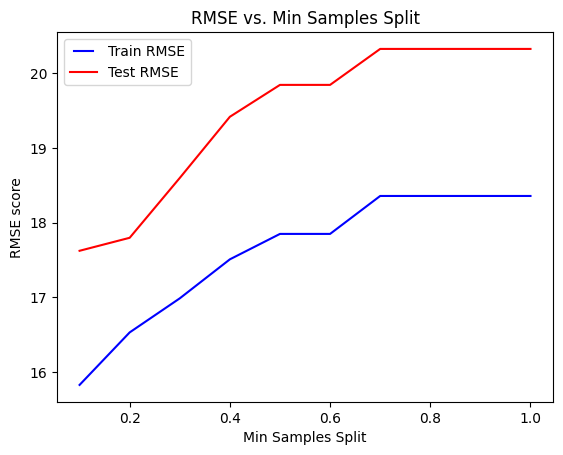

In [11]:
# Plotting the results
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('Min Samples Split')
plt.title('RMSE vs. Min Samples Split')
plt.show()

#### Observations:
- From the graph 0.2 seems to be optimal value for Min Samples Split

### Min samples leaf

In [12]:
# Setting up the range for min_samples_leaf
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

# Lists to store RMSE results
train_results = []
test_results = []

n_samples = len(X_train)  # Total number of samples in the training set

# Looping through different values of min_samples_leaf
for min_samples_leaf in min_samples_leafs:
    min_samples_leaf_int = int(min_samples_leaf * n_samples)  # Convert proportion to integer
    dt = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf_int)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_rmse = math.sqrt(train_mse)
    test_rmse = math.sqrt(test_mse)
    
    train_results.append(train_rmse)
    test_results.append(test_rmse)

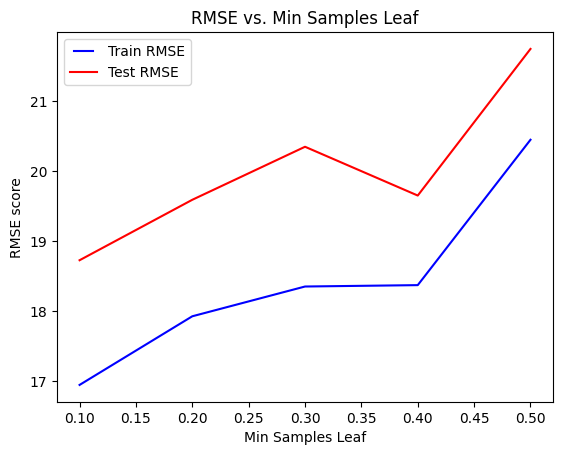

In [13]:
# Plotting the results
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('Min Samples Leaf')
plt.title('RMSE vs. Min Samples Leaf')
plt.show()

#### Observations:
- From the graph 0.1 seems to be the optimal value

### feature_importances
- Let's check the feature_importances_ with a default DecisionTreeRegressor()

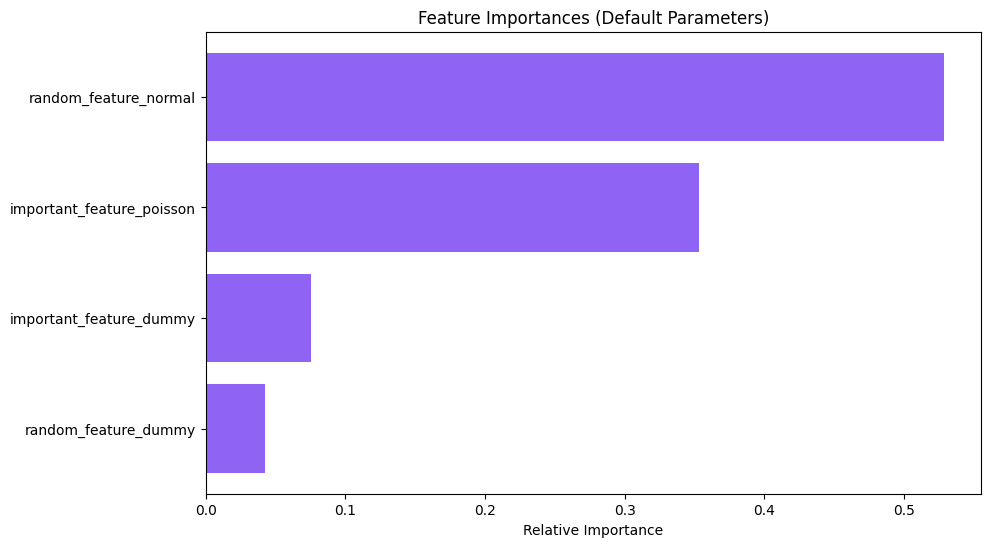

In [14]:
# Fit the model with default parameters
regr = DecisionTreeRegressor()
model = regr.fit(X, y)

# Get feature importances
features = X.columns.values
importances = regr.feature_importances_
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Default Parameters)')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observation on default feature importances
- **The random normal feature is ranked as the most important feature, even though we know for a fact that this feature has no impact on Y.**


### Feature Importances with hyperparameters

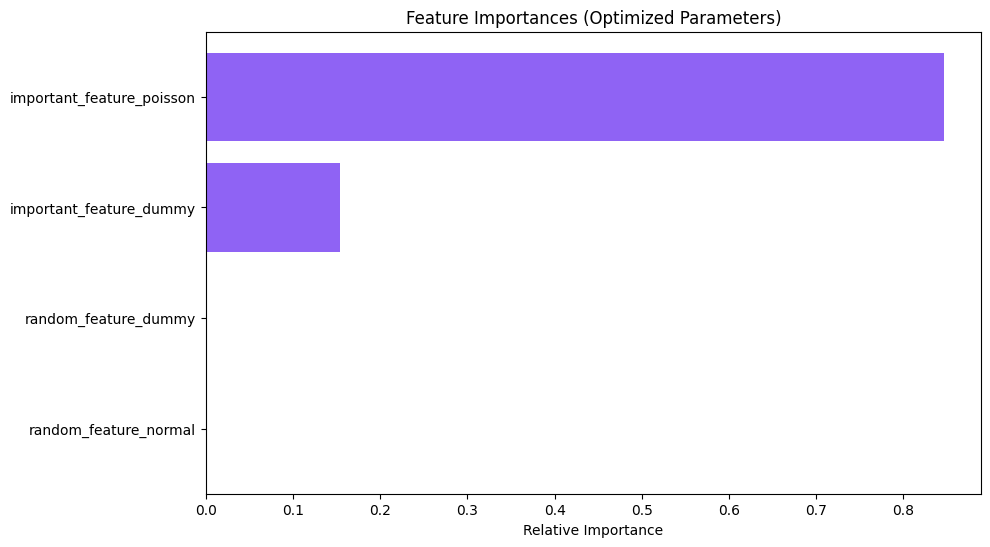

In [15]:
# Fit the model with optimized hyperparameters
optimal_depth = 4
optimal_min_samples_split = 0.2  # From previous graph
optimal_min_samples_leaf = int(0.1 * len(X_train))  # From previous graph

regr_optimized = DecisionTreeRegressor(max_depth=optimal_depth, min_samples_split=optimal_min_samples_split, min_samples_leaf=optimal_min_samples_leaf, random_state=42)
model_optimized = regr_optimized.fit(X, y)

# Get feature importances
importances_optimized = regr_optimized.feature_importances_
indices_optimized = np.argsort(importances_optimized)

# Plot feature importances for optimized model
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Optimized Parameters)')
plt.barh(range(len(indices_optimized)), importances_optimized[indices_optimized], color='#8f63f4', align='center')
plt.yticks(range(len(indices_optimized)), features[indices_optimized])
plt.xlabel('Relative Importance')
plt.show()

#### Observation:
- Here the model acheived perfection when the best parameters are introduced to the model. It showed the importance of relevant features

## Decision Tree with optimal parameters from the above analysis

In [16]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters from previous tuning
optimal_depth = 4  # Determined from previous graph
optimal_min_samples_split = 0.2  # Determined from previous graph
optimal_min_samples_leaf = int(0.1 * len(X_train))  # Determined from previous graph

# Building a Decision Tree Regressor with controlled hyperparameters to avoid overfitting
dt_regressor = DecisionTreeRegressor(
    max_depth=optimal_depth, 
    min_samples_split=optimal_min_samples_split, 
    min_samples_leaf=optimal_min_samples_leaf, 
    random_state=42
)
dt_regressor.fit(X_train, y_train)

# Predicting on the test dataset
y_pred = dt_regressor.predict(X_test)

# Computing the Root Mean Squared Error (RMSE) for the test dataset
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Calculating R-squared for accuracy
accuracy = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"Accuracy (R-squared): {accuracy:.4f}")

RMSE: 16.0874
Accuracy (R-squared): 0.3334


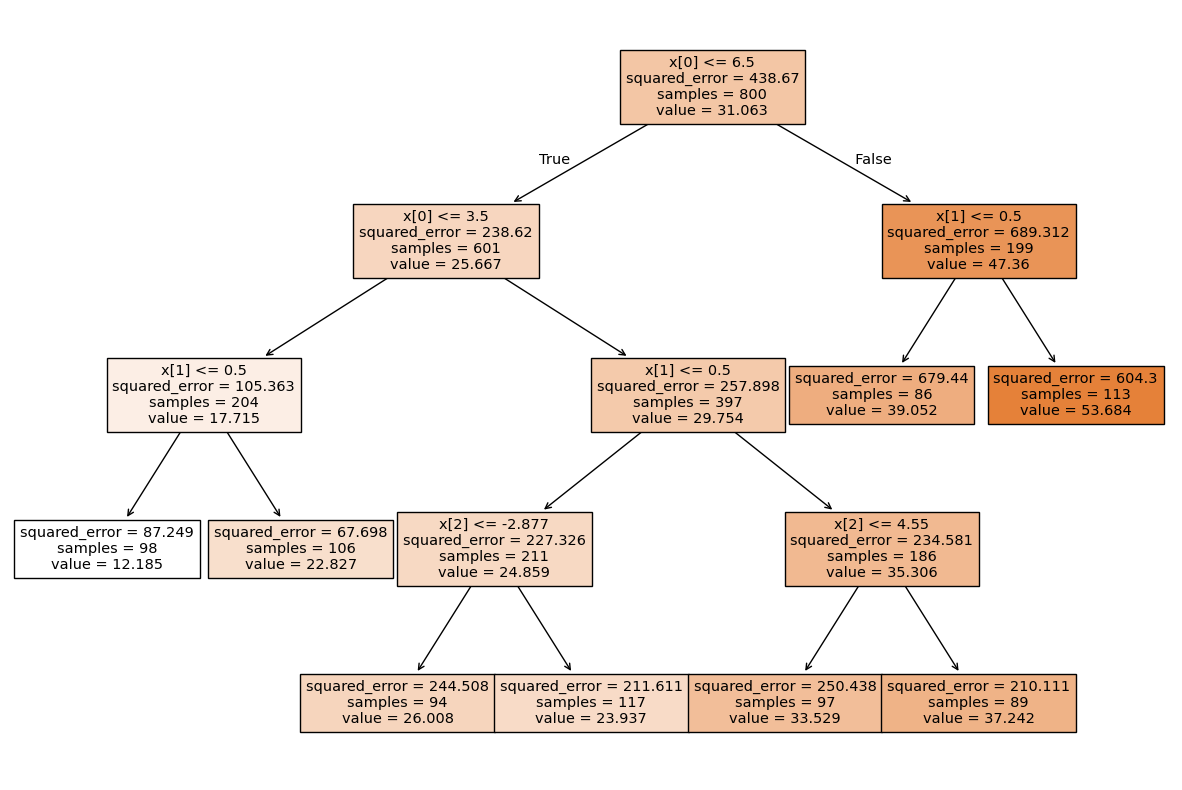

In [17]:
# Plotting the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_regressor, filled=True)
plt.show()

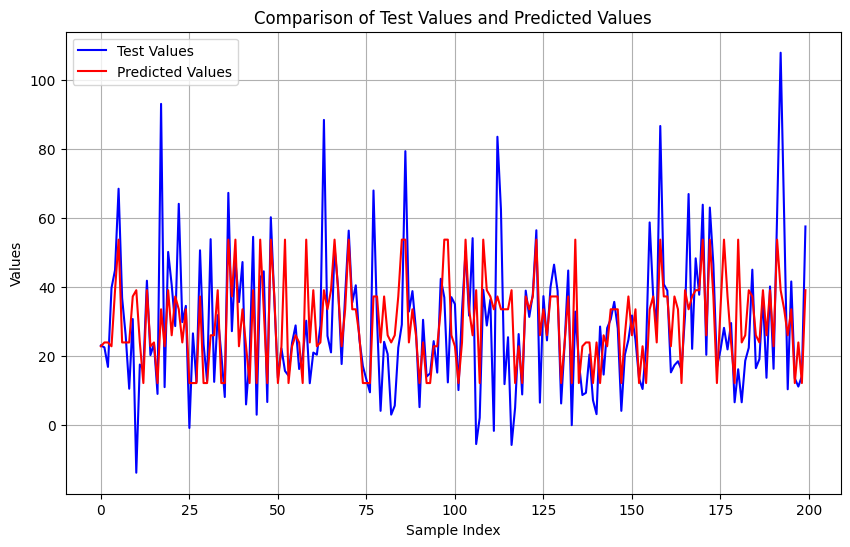

In [18]:
# Converting to NumPy array for easier plotting
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# Index for plotting
index = np.arange(len(y_test_array))

# Plotting the test values and predicted values
plt.figure(figsize=(10, 6))
plt.plot(index, y_test_array, label='Test Values', color='blue')
plt.plot(index, y_pred_array, label='Predicted Values', color='red')
plt.title('Comparison of Test Values and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

#### Observation
- The pattern of Predicted vaules are almost close to the Test values with some order of error

## Bootstrap Aggregated Forest Model

In [19]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of folds for k-fold cross-validation
n_splits = 5

# Initialize KFold
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Base estimator
base_estimator = DecisionTreeRegressor(max_depth=4, min_samples_split=0.2, min_samples_leaf=int(0.1 * len(X_train)), random_state=42)

# Number of trees in the BaggingRegressor
num_trees = 10

# Initialize the BaggingRegressor model
model = BaggingRegressor(estimator=base_estimator, n_estimators=num_trees, random_state=42)

# Empty list to store RMSE scores for each fold
rmse_scores = []

# K-fold cross-validation
for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_val_fold)

    rmse_fold = sqrt(mean_squared_error(y_val_fold, y_pred_fold))
    rmse_scores.append(rmse_fold)

# Converting the list of RMSE scores to a NumPy array and calculate mean RMSE
rmse_scores = np.array(rmse_scores)
mean_rmse = rmse_scores.mean()

# Print the RMSE scores for each fold and the mean RMSE
print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE:", mean_rmse)

RMSE scores for each fold: [18.85072027 18.8412737  16.44739514 16.40831622 18.12953082]
Mean RMSE: 17.735447232187003


In [20]:
# Fit the model to the entire training dataset
model.fit(X_train, y_train)

# Predicting the target values for the test dataset
y_test_pred = model.predict(X_test)
# Calculate RMSE
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))

# Print the RMSE for the test dataset
print("RMSE on Test Dataset:", rmse_test)

RMSE on Test Dataset: 15.781146234692166


### Model Evaluation and Comparison

#### Decision Tree Regressor with Tuned Hyperparameters
- **RMSE:** 16.0874
- **Accuracy (R-squared):** 0.3334

#### Bagging Regressor (Bootstrap Aggregated Forest Model)
- **Cross-Validation RMSE scores for each fold:**
  - Fold 1: 18.8507
  - Fold 2: 18.8412
  - Fold 3: 16.4473
  - Fold 4: 16.4083
  - Fold 5: 18.1295
- **Mean RMSE:** 17.7354
- **RMSE on Test Dataset:** 15.7811

### Conclusion

#### Hyperparameter Tuning
1. **Parameter Selection**:
   - The optimal `max_depth` for the Decision Tree Regressor was determined from the RMSE vs. Tree Depth graph.
   - `min_samples_split` and `min_samples_leaf` were chosen based on their respective RMSE graphs to balance bias and variance.
2. **Feature Importances**:
   - Initial feature importances indicated that the model with default parameters did not reliably identify the true importance of features.
   - After hyperparameter tuning, the Decision Tree model better identified important features relevant to the target variable `Y`.

#### Model Performance
1. **Decision Tree Regressor**:
   - The tuned Decision Tree Regressor provided an RMSE of 16.0874 and an R-squared value of 0.3334 on the test dataset, indicating moderate predictive accuracy.
2. **Bagging Regressor**:
   - The Bagging Regressor (Bootstrap Aggregated Forest Model) improved stability and performance, as indicated by cross-validation RMSE scores.
   - It achieved a lower RMSE of 15.7811 on the test dataset, suggesting better generalization compared to the single Decision Tree Regressor.

#### Insights
1. **Ensemble Learning**:
   - The Bagging Regressor leveraged multiple Decision Trees to reduce overfitting and improve performance, as evidenced by the lower test RMSE.
2. **Hyperparameter Impact**:
   - Hyperparameter tuning significantly enhanced model performance and feature selection accuracy, demonstrating the importance of parameter optimization.

#### Next Steps
    **Model Validation**:
       - Further validate the Bagging Regressor using cross-validation techniques to ensure robustness.
    **Continuous Improvement**:
       - Explore additional ensemble methods and further parameter tuning to enhance predictive accuracy and generalization.

**Overall, the process demonstrated the effectiveness of hyperparameter tuning and ensemble learning in improving the performance and reliability of machine learning models. The Bagging Regressor, with its lower RMSE and better generalization, is a promising model.**